<h1 align="center"> Homework 6 Programming Task</h1>
<h3 align="center"> IST 5520: Data Methodologies in Python, 2018 Spring </h3>
<h3 align="center"> Student: XXX </h3>

**Instruction:**

Complete the following tasks (2 points for each task and question, 24 points in total). You can add additional lines if necessary.

# Task: Summarize and Visualize Data (24 points)

## (1) Read in dataset

The 'cereal.txt' file contains a dataset of 77 cereals.
Variables include:

- Name: Name of cereal
- mfr: Manufacturer of cereal where A = American Home Food Products; G = General Mills; K = Kelloggs; N = Nabisco; P = Post; Q = Quaker Oats; R = Ralston Purina
- type: cold or hot
- calories: calories per serving
- protein: grams of protein
- fat: grams of fat
- sodium: milligrams of sodium
- fiber: grams of dietary fiber
- carbo: grams of complex carbohydrates
- sugars: grams of sugars
- potass: milligrams of potassium
- vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended
- shelf: display shelf (1, 2, or 3, counting from the floor)
- weight: weight in ounces of one serving
- cups: number of cups in one serving
- rating: a rating of the cereals

Hint: use '\t' as seperator of data elements in the txt file.

In [1]:
import pandas as pd
df = pd.read_csv('../Data/Cereals.txt',sep='\t')
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


## (2) Print the number of observations and the number of variables in the dataset.

Use the following format:

"Number of observations = 77"

"Number of variables = 16"

In [2]:
print('Number of observations =', df.shape[0])

Number of observations = 77


In [3]:
print('Number of variables =', df.shape[1])

Number of variables = 16


## (3) Create a contingency table of 'calories' and 'sugars', showing subtotals (margins)

In [4]:
pd.crosstab(df['calories'], df['sugars'], margins=True)

sugars,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,All
calories,,,,,,,,,,,,,,,,,,
50,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
70,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,2
80,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
90,0,2,0,1,0,0,2,2,0,0,0,0,0,0,0,0,0,7
100,1,1,0,1,5,0,2,3,1,1,0,1,0,0,0,0,1,17
110,0,0,1,1,8,0,0,1,2,2,1,2,2,4,3,1,1,29
120,0,0,0,0,0,1,0,0,0,1,2,1,1,3,0,1,0,10
130,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,2
140,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,3


**Question 1**: What is the value in the cell where sugars=3 and calories=110? Type your answer below (1 point)

Your answer: 8

Interpret the meaning of this value below (1 point).

Your interpretation:

Among the 77 cereals, there are 8 cereals that have 3 grams of sugar and 110 calories per serving.


## (4) Draw a scatter plot of 'calories' and 'sugars'.

Use sugars as x variable, calories as y variable.

Specify the labels of x-axis and y-axis by using easy-to-understand language.

In [5]:
import matplotlib.pyplot as plt

In [6]:
# Enable inline plotting in notebook
%matplotlib inline

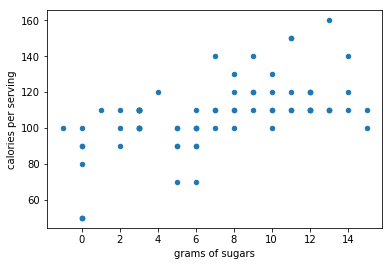

In [7]:
df.plot(kind='scatter',x='sugars',y='calories')
plt.xlabel('grams of sugars')
plt.ylabel('calories per serving')

**Question 2**: Based on the scatter plot, what is the relationship between sugars and calories? Type your answer below.(2 points)

Your answer:

These two variables are positively correlated.


## (5) Draw a boxplot of calories, sugars, and rating.

Show all the boxplots in a single graph. 

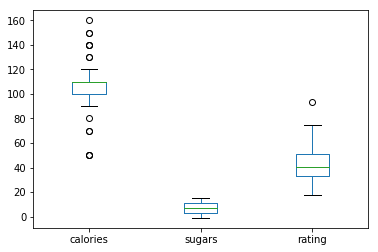

In [8]:
df[['calories','sugars','rating']].plot.box()

**Question 3**: Based on the box plot, which variable contains outliers? Type all variables below.(2 points)

Your answer:

Both the calories and rating variables contain outliers.

## (6) From the above step, select the variable that contains the largest number of outlier, detect all outliers in that variable.

Show all observations in the dataset that contain outliers for the variable. 

In [9]:
# Calculate the first quantile
first_quantile = df['calories'].quantile(0.25)

# Calculate the first quantile
third_quantile = df['calories'].quantile(0.75)

# Calculate the interquantile range (IQR)
IQR = third_quantile - first_quantile

In [10]:
# Outliers below the boxplot
df[df['calories']<first_quantile-1.5*IQR]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
54,Puffed_Rice,Q,C,50,1,0,0,0.0,13.0,0,15,0,3,0.50,1.00,60.756112
55,Puffed_Wheat,Q,C,50,2,0,0,1.0,10.0,0,50,0,3,0.50,1.00,63.005645
63,Shredded_Wheat,N,C,80,2,0,0,3.0,16.0,0,95,0,1,0.83,1.00,68.235885


In [11]:
# Outliers below the boxplot
df[df['calories']>third_quantile+1.5*IQR]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
7,Basic_4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562
39,Just_Right_Fruit_&_Nut,K,C,140,3,1,170,2.0,20.0,9,95,100,3,1.30,0.75,36.471512
44,"Muesli_Raisins,_Dates,_&_Almonds",R,C,150,4,3,95,3.0,16.0,11,170,25,3,1.00,1.00,37.136863
45,"Muesli_Raisins,_Peaches,_&_Pecans",R,C,150,4,3,150,3.0,16.0,11,170,25,3,1.00,1.00,34.139765
46,Mueslix_Crispy_Blend,K,C,160,3,2,150,3.0,17.0,13,160,25,3,1.50,0.67,30.313351
49,Nutri-Grain_Almond-Raisin,K,C,140,3,2,220,3.0,21.0,7,130,25,3,1.33,0.67,40.692320
51,Oatmeal_Raisin_Crisp,G,C,130,3,2,170,1.5,13.5,10,120,25,3,1.25,0.50,30.450843
70,Total_Raisin_Bran,G,C,140,3,1,190,4.0,15.0,14,230,100,3,1.50,1.00,28.592785


**Question 4**: How many outliers have you detected? Type your answer below.(2 points)

Print your answer below. Use the format 'The number of outliers detected = xx'.

In [12]:
outlier_num = df[df['calories']<first_quantile-1.5*IQR].shape[0]+df[df['calories']>third_quantile+1.5*IQR].shape[0]

print('The number of outliers detected =',outlier_num)

The number of outliers detected = 14


## (7) Draw a bar chart of average rating score for all manufacturers.

Show a bar for each manufacturer.

Use the full names of manufacturers rather than the abbreviations.

Show standard errors on the bars.

In [13]:
# Calculate mean ratings
mean_rating_by_mfg = df[['mfr','rating']].groupby('mfr').mean()

mean_rating_by_mfg.index = ['American Home Food Products',
                            'General Mills',
                            'Kelloggs',
                            'Nabisco',
                            'Post',
                            'Quaker Oats',
                            'Ralston Purina']
mean_rating_by_mfg

,rating
American Home Food Products,54.850917
General Mills,34.485852
Kelloggs,44.038462
Nabisco,67.968567
Post,41.705744
Quaker Oats,42.915990
Ralston Purina,41.542997


In [14]:
# Calculate standard errors
std = df[['mfr','rating']].groupby('mfr').std()

# Recode the index. The std1 must have the same index as the mean data, or else the barchar with error bars would be wrong.
std.index = ['American Home Food Products',
             'General Mills',
             'Kelloggs',
             'Nabisco',
             'Post',
             'Quaker Oats',
             'Ralston Purina']

std

,rating
American Home Food Products,NaN
General Mills,8.946704
Kelloggs,14.457434
Nabisco,5.509326
Post,10.047647
Quaker Oats,16.797673
Ralston Purina,6.080841


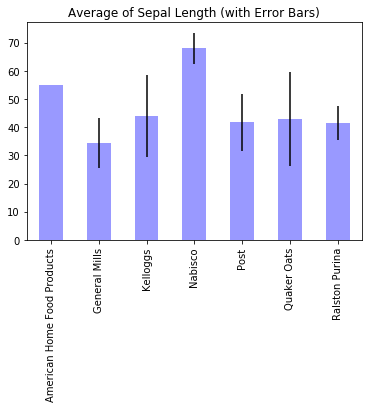

In [15]:
mean_rating_by_mfg.plot(kind='bar', color='b', yerr = std, alpha=0.4,align='center',legend = False)
plt.title('Average of Sepal Length (with Error Bars)')
plt.xticks(rotation=90)
plt.show()

**Question 5**: Based on the above bar plot, which manufacturer has the highest average rating score? Which manufacture receives the greatest variation in the rating scores? Type your answers below.(2 points)

Your answer:

Nabisco has the highest average rating, while Quaker Oats has the highest variation in its rating scores.